# Clustering Challenge - Supervised and Unsupervised Clustering
### Jamie Walsh
### Stellar Classification Dataset - SDSS17

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA

In [3]:
## Read in our dataset
df = pd.read_csv("star_classification.csv")

# EDA

In [4]:
# Check the first few entries of the dataset
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
# Check the shape - 18 cols, 100,000 rows
df.shape

(100000, 18)

In [6]:
df.columns  # column titles

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

#### Column Information (from dataset source)

1) obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2) alpha = Right Ascension angle (at J2000 epoch)
3) delta = Declination angle (at J2000 epoch)
4) u = Ultraviolet filter in the photometric system
5) g = Green filter in the photometric system
6) r = Red filter in the photometric system
7) i = Near Infrared filter in the photometric system
8) z = Infrared filter in the photometric system
9) run_ID = Run Number used to identify the specific scan
10) rereun_ID = Rerun Number to specify how the image was processed
11) cam_col = Camera column to identify the scanline within the run
12) field_ID = Field number to identify each field
13) spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14) class = object class (galaxy, star or quasar object)
15) redshift = redshift value based on the increase in wavelength
16) plate = plate ID, identifies each plate in SDSS
17) MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18) fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [7]:
## Checking the datatypes - they are all numerical apart from the class
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [9]:
df.isna().sum() # there are no null values

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [10]:
## checking for duplicates
dup_rows = df[df.duplicated()]
dup_rows.shape  # there are no duplicates


(0, 18)

In [11]:
df['class'].head(50)

0     GALAXY
1     GALAXY
2     GALAXY
3     GALAXY
4     GALAXY
5        QSO
6        QSO
7     GALAXY
8     GALAXY
9       STAR
10    GALAXY
11    GALAXY
12      STAR
13    GALAXY
14    GALAXY
15    GALAXY
16      STAR
17       QSO
18      STAR
19    GALAXY
20    GALAXY
21      STAR
22    GALAXY
23       QSO
24    GALAXY
25    GALAXY
26    GALAXY
27    GALAXY
28    GALAXY
29    GALAXY
30    GALAXY
31    GALAXY
32    GALAXY
33       QSO
34    GALAXY
35    GALAXY
36    GALAXY
37    GALAXY
38      STAR
39    GALAXY
40      STAR
41    GALAXY
42    GALAXY
43    GALAXY
44    GALAXY
45      STAR
46    GALAXY
47       QSO
48       QSO
49    GALAXY
Name: class, dtype: object

In [12]:
## Using OrdinalEncoder to convert class into integers as there are only 3 classes
enc = OrdinalEncoder(dtype=int) # set the dtype of the ordinal encoder to integer
df['class'] = enc.fit_transform(df[['class']])
df['class'].head(50)

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     0
8     0
9     2
10    0
11    0
12    2
13    0
14    0
15    0
16    2
17    1
18    2
19    0
20    0
21    2
22    0
23    1
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    1
34    0
35    0
36    0
37    0
38    2
39    0
40    2
41    0
42    0
43    0
44    0
45    2
46    0
47    1
48    1
49    0
Name: class, dtype: int32

Comparing the pre and post converted data:

GALAXY : 0
QSO : 1
STAR: 2

In [13]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.621490,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.816778,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,0.000000,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.000000,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.000000,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,1.000000,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,2.000000,7.011245,12547.000000,58932.000000,1000.000000


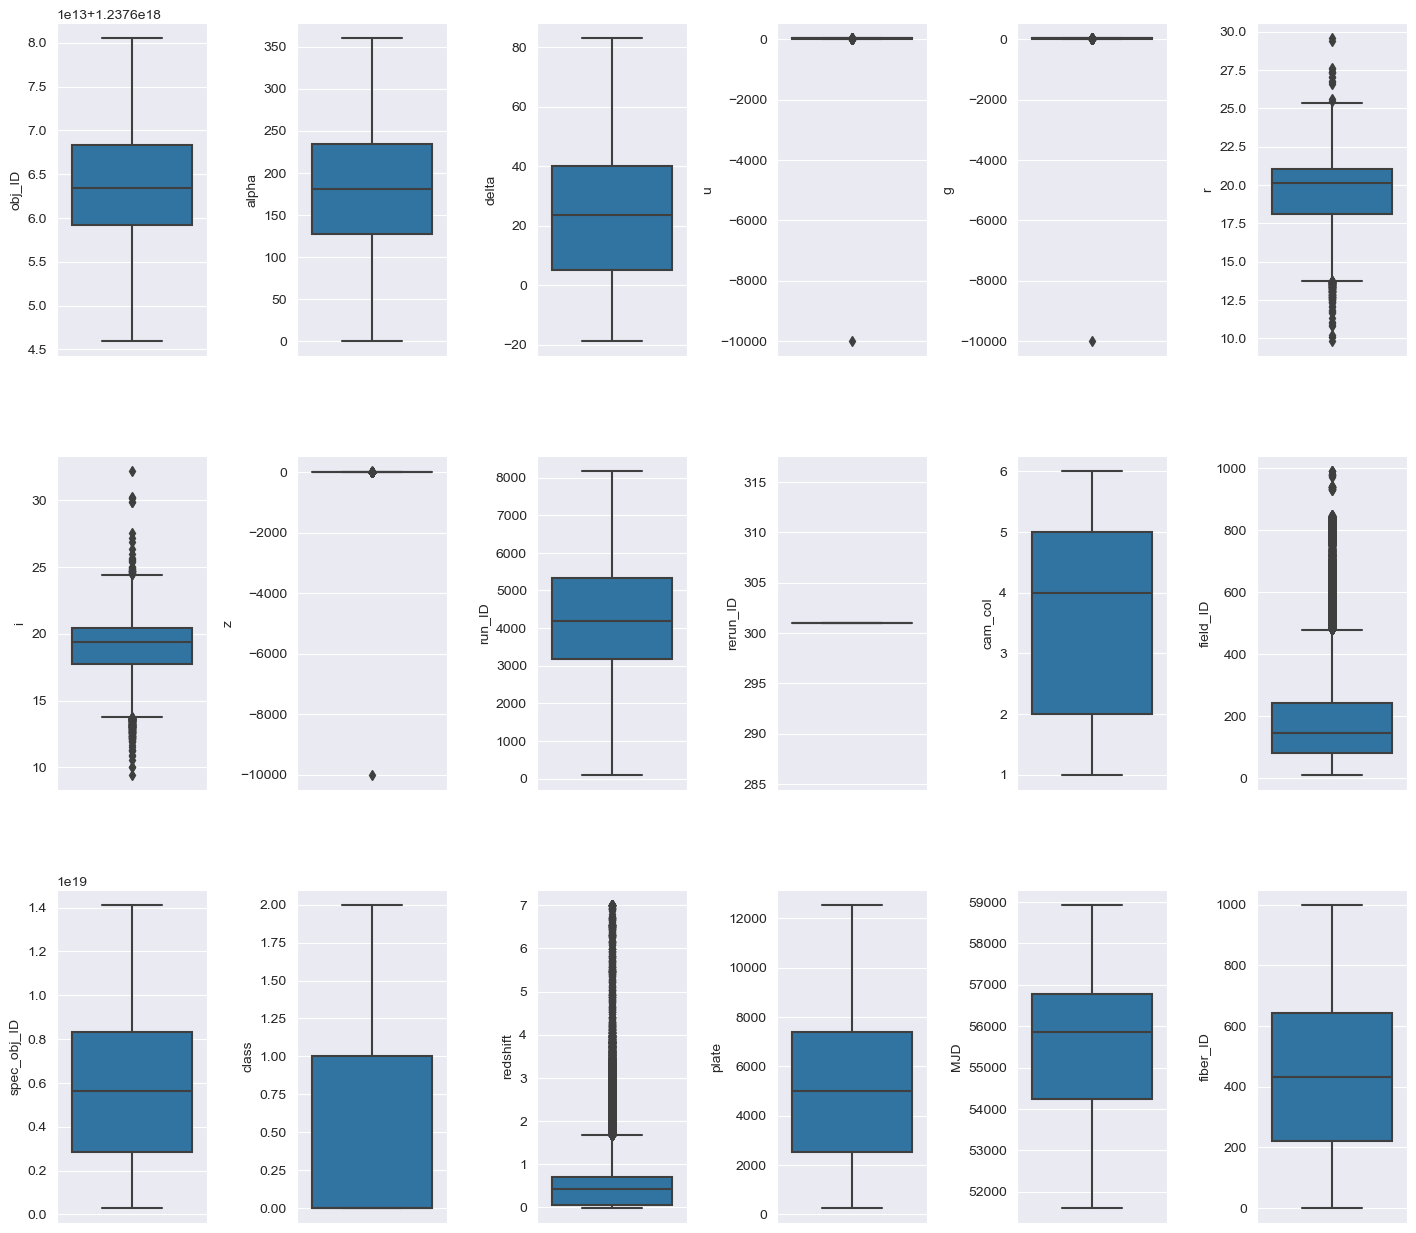

In [14]:
## Plotting boxplots
fig = plt.figure(figsize=(15, 15))

for i in range(len(df.columns)):
    fig.add_subplot(3,6, i+1)
    sns.boxplot(y=df[df.columns[i]])

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1,
                    top=0.9,
                    wspace=0.6,
                    hspace=0.3)

plt.show()

In [15]:
### What to do with outliers here? - change the values or get rid?

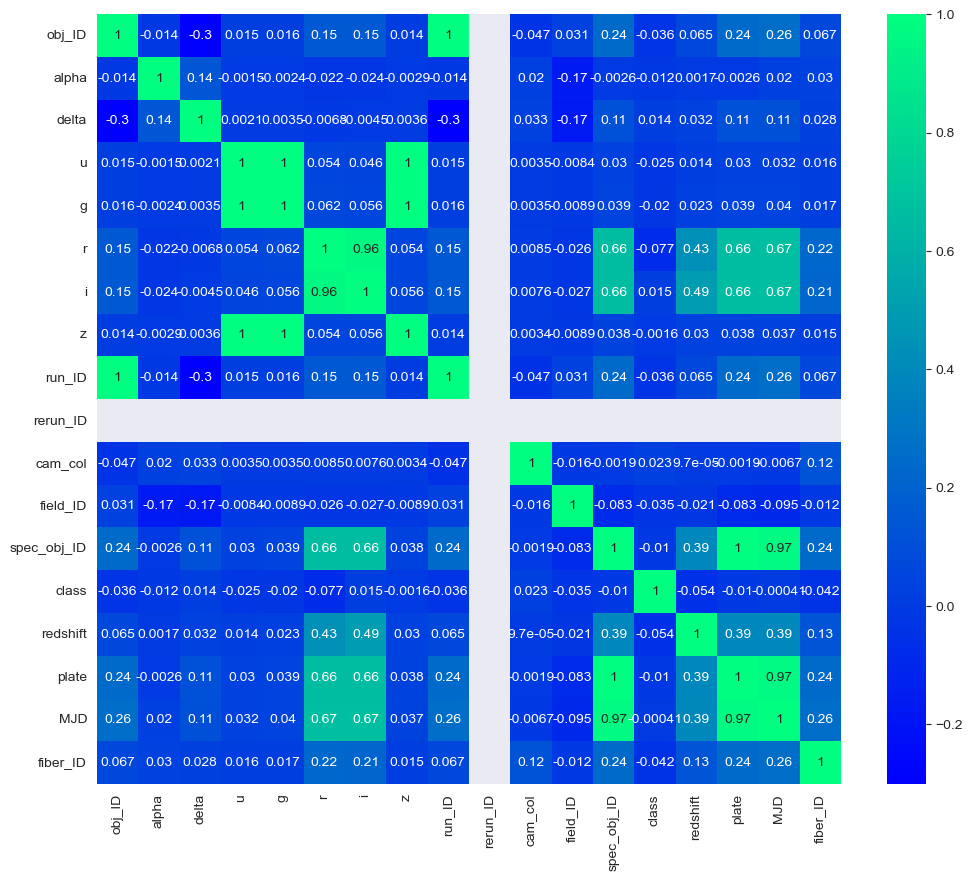

In [16]:
## Plotting the correlation of the data with a heatmap - some strong positive correlations are seen.

plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='winter')
plt.show()

### Modelling - Feature selection

Aim is to classify objects as Galaxies,